In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import random

I did not push George's data files. These have to be placed in the respective relative path, i.e., '../data/selected_sgra_images/'.

# importing and plotting hdf5 files

Import all the filenames and check that n=0, n=1, and n=all have the same length.

In [2]:
# Directory containing your data files
data_folder = '../data/selected_sgra_images/'

# List all files in the directory
file_names = os.listdir(data_folder)

# Filter files with a specific extension, e.g., HDF5 files
hdf5_files_n000 = sorted([file for file in file_names if file.endswith('n000.h5')])
hdf5_files_n001 = sorted([file for file in file_names if file.endswith('n001.h5')])
hdf5_files_nall = sorted([file for file in file_names if file.endswith('nall.h5')])

# Print the list of HDF5 files
print(len(hdf5_files_n000))
print(len(hdf5_files_n001))
print(len(hdf5_files_nall))

105
105
105


Check that the files are now sorted.

In [3]:
random_index = random.randint(0, len(hdf5_files_nall) - 1)

print(hdf5_files_n000[random_index])
print(hdf5_files_n001[random_index])
print(hdf5_files_nall[random_index])

sgra_Sa-0.5_70_3_0230_1_1_n000.h5
sgra_Sa-0.5_70_3_0230_1_1_n001.h5
sgra_Sa-0.5_70_3_0230_1_1_nall.h5


Let's load and look at the images for a specific case.

First, check George's hdf5 format. Turns out that what we need is in 'unpol', I think.

In [4]:
with h5py.File(os.path.join(data_folder, hdf5_files_n000[random_index]), 'r') as file:
    # List all the keys (dataset names) in the HDF5 file
    print("Keys: %s" % list(file.keys()))

Keys: ['Ftot_unpol', 'Ladv', 'Mdot', 'MdotEdd', 'count', 'fluid_header', 'header', 'nuLnu', 'nuLnu_unpol', 'tau', 'unpol']


In [5]:
with h5py.File(os.path.join(data_folder, hdf5_files_n000[random_index]), 'r') as file:
    # some seem to be single values
    print('Ftot_unpol: ',file['Ftot_unpol'][()])
    print('Ladv: ',file['Ladv'][()])
    print('Mdot: ',file['Mdot'][()])
    print('MdotEdd: ',file['MdotEdd'][()])
    print('count: ',file['count'][()])

Ftot_unpol:  2.13697442535773
Ladv:  0.008856732000858325
Mdot:  4.346498077218715e+17
MdotEdd:  5.736177188287335e+24
count:  100


In [6]:
with h5py.File(os.path.join(data_folder, hdf5_files_n000[random_index]), 'r') as file:
    # some other keys are groups
    header = file['header']
    print("Members of the group header:")
    for member in header:
        print(member)
        
    # let's check the 'camera'
    camera = header['camera']
    print("Members of the group camera:")
    for member in camera:
        print(member)
        
    print("inclination:")
    print(file['header']['camera']['thetacam'][()])

Members of the group header:
camera
dsource
electrons
evpa_0
field_config
freqcgs
githash
scale
sigma_cut
t
units
version
Members of the group camera:
dx
dy
fovx
fovx_dsource
fovy
fovy_dsource
nx
ny
phicam
rcam
rotcam
thetacam
x
xoff
yoff
inclination:
70.0


From all of this we now know the inclination.


In [7]:
with h5py.File(os.path.join(data_folder, hdf5_files_n000[random_index]), 'r') as file:
    print(file['header']['camera']['thetacam'][()])

70.0


In [8]:
# Open the HDF5 file
with h5py.File(os.path.join(data_folder, hdf5_files_n000[random_index]), 'r') as file:
    # some other keys are groups
    group = file['fluid_header']
    print("Members of the group fluid_header:")
    for member in group:
        print(member)

Members of the group fluid_header:
Tp
a
add_flags
add_jcon
base
beta_min
bsq_over_rho_max
cfl
coordinates
cour
dt
dump_cadence
dx1
dx2
dx3
electrons
file_type
gam
gamma
geom
ghost_zones
gridfile
hslope
ktot_max
metric
mks_smooth
n1
n1tot
n2
n2tot
n3
n3tot
n_dim
n_dump
n_prim
n_prims_passive
n_step
ne
ng
np
numlevel
nx1
nx2
nx3
on
poly_alpha
poly_norm
poly_xt
prim_names
problem_id
r_eh
r_in
r_out
reconstruction
refinement
rho_min_geom
rin
rmax
startx1
startx2
startx3
t
tf
tlim
transform
type
u_jitter
u_min_geom
variables
verbose
version


And here is the spin.

In [9]:
with h5py.File(os.path.join(data_folder, hdf5_files_n000[random_index]), 'r') as file:
    print(file['fluid_header']['a'][()])

-0.5


Read the files (both n=0 and n=1 for the specific case).

In [10]:
# Open the HDF5 file
with h5py.File(os.path.join(data_folder, hdf5_files_n000[random_index]), 'r') as file:
    # read data
    unpol_n000 = file['unpol'][()]
with h5py.File(os.path.join(data_folder, hdf5_files_n001[random_index]), 'r') as file:
    # read data
    unpol_n001 = file['unpol'][()]
with h5py.File(os.path.join(data_folder, hdf5_files_nall[random_index]), 'r') as file:
    # read data
    unpol_nall = file['unpol'][()]

Plot the respective data.
(I cannot make sense of the nall case.)

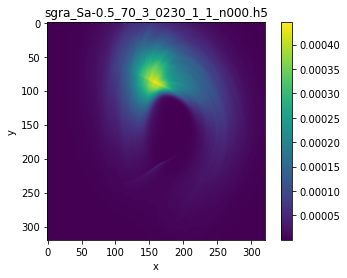

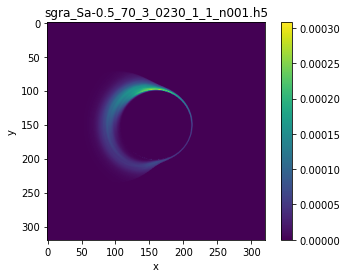

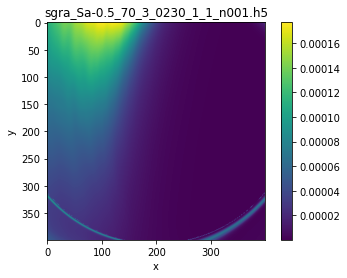

In [11]:
# n=0
plt.imshow(unpol_n000, cmap='viridis')  # You can choose any colormap you like
plt.colorbar()  # Add a color bar for reference
plt.title(hdf5_files_n000[random_index])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# n=1
plt.imshow(unpol_n001, cmap='viridis')  # You can choose any colormap you like
plt.colorbar()  # Add a color bar for reference
plt.title(hdf5_files_n001[random_index])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# n=1
plt.imshow(unpol_nall, cmap='viridis')  # You can choose any colormap you like
plt.colorbar()  # Add a color bar for reference
plt.title(hdf5_files_n001[random_index])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# reading George's rex fits

If I understand correctly, George already ran rax over all those cases and the output is loaded below.

In [12]:
rex_data = np.load('rex_statistics_sgra.npy', allow_pickle=True).item()

It seems that REX data has only been obtained on a subset. Let's thus select a subset.

In [13]:
# Substring to search for
substring = "Ma+0.5_30"

# Select strings containing the substring
hdf5_files_n000_MAD = sorted([s for s in hdf5_files_n000 if s.find(substring) != -1])
hdf5_files_n001_MAD = sorted([s for s in hdf5_files_n001 if s.find(substring) != -1])
hdf5_files_nall_MAD = sorted([s for s in hdf5_files_nall if s.find(substring) != -1])

print(len(hdf5_files_n000_MAD))

10


Here is an example of how to obtain the REX output.

In [14]:
random_index_MAD = random.randint(0, len(hdf5_files_n000_MAD) - 1)
print(hdf5_files_n000_MAD[random_index_MAD][:-8])

sgra_Ma+0.5_30_2_0230_1_40


Here is an example of this output.

In [15]:
casestring = hdf5_files_n000_MAD[random_index_MAD][:-8]
print(casestring)

print('n=0 fit params')
print(rex_data[casestring][1])

print('n=1 fit params')
print(rex_data[casestring][2])

print('centroid_shift_x (as n=1 minus n=0)')
print(rex_data[casestring][2][1] - rex_data[casestring][1][1])

print('centroid_shift_y (as n=1 minus n=0)')
print(rex_data[casestring][2][2] - rex_data[casestring][1][2])

sgra_Ma+0.5_30_2_0230_1_40
n=0 fit params
[51.15121739839316, 0.07935784361190201, 4.489140677966887]
n=1 fit params
[52.73600144887957, -2.1717585014047955, -0.8078729178775887]
centroid_shift_x (as n=1 minus n=0)
-2.2511163450166976
centroid_shift_y (as n=1 minus n=0)
-5.297013595844476


So, let's combine this into a table of (spin, inclination, centroid shift).

In [16]:
data = []

# Loop over each filename in the array
for hdf5_file in hdf5_files_n000_MAD:
    # prepare only part of the filename for REX
    casestring = hdf5_file[:-8]
    # Open the HDF5 file
    with h5py.File(os.path.join(data_folder, hdf5_file), 'r') as file:
        spin = file['fluid_header']['a'][()]
        inclination = file['header']['camera']['thetacam'][()]
        centroid_shift_x = rex_data[casestring][2][1] - rex_data[casestring][1][1]
        centroid_shift_y = rex_data[casestring][2][2] - rex_data[casestring][1][2]
    data.append([spin, inclination, centroid_shift_x, centroid_shift_y])

In [17]:
data

[[0.5, 30.0, -2.3257025019224784, -5.091314582285733],
 [0.5, 30.0, -2.0564617010417976, -4.9752218467249065],
 [0.5, 30.0, -2.0419097591509683, -5.4653659721942205],
 [0.5, 30.0, -2.2511163450166976, -5.297013595844476],
 [0.5, 30.0, -1.676077384075029, -3.935257862564896],
 [0.5, 30.0, -1.6237283038589965, -4.092058024587942],
 [0.5, 30.0, -1.9734334886852736, -5.256515475689156],
 [0.5, 30.0, -2.109924231434576, -4.93355515754854],
 [0.5, 30.0, -1.68114176448762, -4.914703015917553],
 [0.5, 30.0, -2.3578725927475404, -5.493796995699881]]

To me this looks encouraging. All of the cases show a pretty consistent and large centroid shift in the y direction.

However, I am not sure I trust REX after what we did at the workshop.